In [4]:
import numpy as np
import pandas as pd
import Auxillary_Functions as af
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yaml
import math

environment_path = 'environment.yml'
af.read_data(environment_path)

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

from sklearn import preprocessing
from sklearn import datasets, linear_model

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit, \
        validation_curve, cross_validate, train_test_split, KFold, cross_val_predict
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelBinarizer, RobustScaler, PolynomialFeatures

# Load csvs from path and provide summary statistics
file_path_1 = 'Bike-Sharing-Dataset/day.csv'
file_path_2 = 'Bike-Sharing-Dataset/hour.csv'

raw_day_df = af.read_data(file_path_1)
raw_hour_df = af.read_data(file_path_2)
    

In [3]:
raw_day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [4]:
raw_hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


# Exploratory Data Analysis

In [10]:
raw_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
raw_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
raw_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
raw_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
raw_day_df.isnull().values.any()

False

In [6]:
raw_hour_df.isnull().values.any()

False

# Data Cleaning and Preparation

## Checking for correctness in dates

In [73]:
raw_hour_df['dteday'] = pd.to_datetime(raw_hour_df.dteday)

First check if column 'mnth' corresponds to the month value from 'dteday' column

In [56]:
all(raw_hour_df['dteday'].dt.month == raw_hour_df['mnth'])

True

Then check if column 'yr' corresponds to the year values from 'dteday' column represented as binary

In [64]:
binary_year = pd.Series(raw_hour_df['dteday'].dt.year == 2012)
all(binary_year == raw_hour_df['yr'].astype('bool'))

True

Finally, create a 'day' column that represents the day of the month

In [74]:
raw_hour_df['day'] = raw_hour_df['dteday'].dt.day
raw_hour_df = raw_hour_df.drop(['instant', 'dteday'], axis = 1)
raw_hour_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


Defining previous steps as function to later use in data preparation pipeline:

In [7]:
def drop_columns(df):
    df = df.drop(['instant', 'dteday','temp'], axis = 1)
    return df

## Data preparation 

### Data preparation functions

In [8]:
def fix_types(df):
    df[['season','mnth', 'hr', 'weekday','weathersit']] = df[['season','mnth', 'hr', 'weekday','weathersit']].astype('category')
    df[['yr', 'holiday', 'workingday']] = df[['yr', 'holiday', 'workingday']].astype('uint8')
    return df

In [9]:
def feature_skewness(df):
    numeric_dtypes = ['float64'] ## limiting to explanatory variables
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features

def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[abs(feature_skew) > 0.5]
    skew_index = high_skew.index
    
    new_df = df.copy()
    
    for i in skew_index:
        new_df[i] = boxcox1p(new_df[i], boxcox_normmax(new_df[i]+1))

    skew_features = new_df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return new_df

In [10]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

In [5]:
def standardize_data(df):
    std_scale = preprocessing.MinMaxScaler().fit(df[['atemp', 'hum', 'windspeed']])
    df[['atemp', 'hum', 'windspeed']] = std_scale.transform(df[['atemp', 'hum', 'windspeed']])
    
    return df

### Data Preparation Pipeline

In [11]:
raw_hour_df = af.read_data(file_path_2)
dataset = onehot_encode((fix_types(fix_skewness(standardize_data(drop_columns(raw_hour_df))))))

In [12]:
dataset.head()

,yr,holiday,workingday,atemp,hum,windspeed,casual,registered,cnt,mnth_1,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,0,0,0,0.2879,0.81,0.0,3,13,16,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.2727,0.80,0.0,8,32,40,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.2727,0.80,0.0,5,27,32,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.2879,0.75,0.0,3,10,13,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.2879,0.75,0.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [357]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 61 columns):
yr              17379 non-null uint8
holiday         17379 non-null uint8
workingday      17379 non-null uint8
temp            17379 non-null float64
atemp           17379 non-null float64
hum             17379 non-null float64
windspeed       17379 non-null float64
casual          17379 non-null int64
registered      17379 non-null int64
cnt             17379 non-null int64
season_1        17379 non-null uint8
season_2        17379 non-null uint8
season_3        17379 non-null uint8
season_4        17379 non-null uint8
weathersit_1    17379 non-null uint8
weathersit_2    17379 non-null uint8
weathersit_3    17379 non-null uint8
weathersit_4    17379 non-null uint8
hr_0            17379 non-null uint8
hr_1            17379 non-null uint8
hr_2            17379 non-null uint8
hr_3            17379 non-null uint8
hr_4            17379 non-null uint8
hr_5            17379 non-null u

In [13]:
feature_skewness(raw_hour_df)

(windspeed    0.574856
 temp        -0.006020
 atemp       -0.090421
 hum         -0.111278
 dtype: float64, ['temp', 'atemp', 'hum', 'windspeed'])

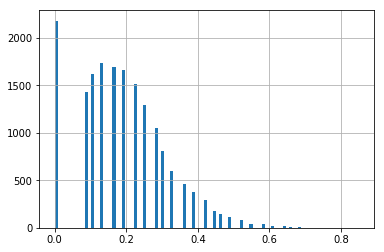

In [14]:
raw_hour_df.windspeed.hist(bins = 100)

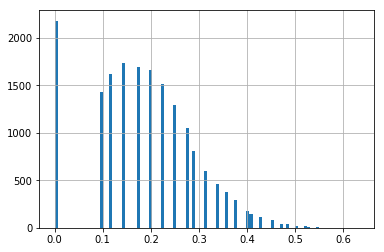

In [15]:
dataset.windspeed.hist(bins = 100)

# Baseline model

Split in test and train set

In [16]:
test = dataset[(dataset.yr == 1) & ((dataset.mnth_10 == 1)|(dataset.mnth_11 == 1)|(dataset.mnth_12 == 1))]
train = dataset[:(len(dataset)-len(test))]

In [361]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
15211,1,0,1,0.46,0.4545,0.72,0.097206,6,39,45,...,1,0,0,0,1,0,0,0,0,0
15212,1,0,1,0.44,0.4394,0.77,0.084177,5,13,18,...,1,0,0,0,1,0,0,0,0,0
15213,1,0,1,0.46,0.4545,0.72,0.000000,6,6,12,...,1,0,0,0,1,0,0,0,0,0
15214,1,0,1,0.44,0.4394,0.77,0.000000,1,6,7,...,1,0,0,0,1,0,0,0,0,0
15215,1,0,1,0.42,0.4242,0.82,0.097206,0,10,10,...,1,0,0,0,1,0,0,0,0,0


In [363]:
train.tail()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_10,mnth_11,mnth_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
15206,1,0,0,0.50,0.4848,0.72,0.122514,34,223,257,...,0,0,0,1,0,0,0,0,0,0
15207,1,0,0,0.50,0.4848,0.72,0.122514,31,163,194,...,0,0,0,1,0,0,0,0,0,0
15208,1,0,0,0.50,0.4848,0.68,0.000000,19,104,123,...,0,0,0,1,0,0,0,0,0,0
15209,1,0,0,0.48,0.4697,0.72,0.000000,15,76,91,...,0,0,0,1,0,0,0,0,0,0
15210,1,0,0,0.48,0.4697,0.72,0.084177,8,49,57,...,0,0,0,1,0,0,0,0,0,0


Defining the linear regression model for the baseline score

In [17]:
def score_model(train, seed = 123):
    X = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y = train.loc[:, 'cnt']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                        random_state=seed)        
                        
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = [1 if i < 0 else math.ceil(i) for i in regr.predict(X_test)]
    return r2_score(y_test, y_pred)
   

In [20]:
def score_model2(train, test, seed = 123):
    X_train = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y_train = train.loc[:, 'cnt']
    
    X_test = test.loc[:, (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ]
    y_test = test.loc[:, 'cnt']             
                        
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=seed)

    pipeline = Pipeline([
        #('polynomials', PolynomialFeatures(degree=3, include_bias=False)), 
        ('linear_regression', LinearRegression(n_jobs=-1))])
    pipeline.fit(X_train, y_train)
    training_score = pipeline.score(X_test, y_test)
    print('R2 from entire-dataset estimator: {:.2f}'.format(training_score))

    # Obtain scores and estimators from different splits and use the best one.
    scores = cross_validate(pipeline, 
                            X_train, y_train,
                            scoring=['r2'], 
                            cv=cv,
                            return_estimator=True)
    split_scores = [scores['estimator'][i].score(X_test, y_test) 
                    for i in range(len(scores))]
    index_best = split_scores.index(max(split_scores))
    print('Best estimator R2 score: {:.2f}'.format(split_scores[index_best]))

In [21]:
score_model2(train, test)

R2 from entire-dataset estimator: 0.64
Best estimator R2 score: 0.64


## Feature Engineering

In [375]:
def feature_engineering_pipeline(raw_data, fe_functions):
    selected_functions = []
    base_score = score_model(raw_data)
    print('Base Score: {:.4f}'.format(base_score))
    engineered_data = raw_data.copy()
    for fe_function in fe_functions:
        processed_data = globals()[fe_function](engineered_data)
        new_score = score_model(processed_data)
        print('- New Score ({}): {:.4f} '.format(fe_function, new_score), 
              end='')
        difference = (new_score-base_score)
        print('[diff: {:.4f}] '.format(difference), end='')
        if difference > -0.01:
            selected_functions.append(fe_function)
            engineered_data = processed_data.copy()
            base_score = new_score
            print('[Accepted]')
        else:
            print('[Rejected]')
    return selected_functions, engineered_data

In [376]:
def remove_outliers(df):
    X = df.drop(['cnt', 'casual', 'registered'], axis=1)
    y = df.cnt.reset_index(drop=True)
    ols = sm.OLS(endog = y, exog = X)
    fit = ols.fit()
    test = fit.outlier_test()['bonf(p)']
    outliers = list(test[test<1e-3].index) 
    df.drop(df.index[outliers])
    return df

In [383]:
fe_functions = [
               ]
funcs, new_dataset = feature_engineering_pipeline(train, fe_functions)


score_model2(new_dataset, test)


Base Score: 0.7076
R2 from entire-dataset estimator: 0.64
Best estimator R2 score: 0.64


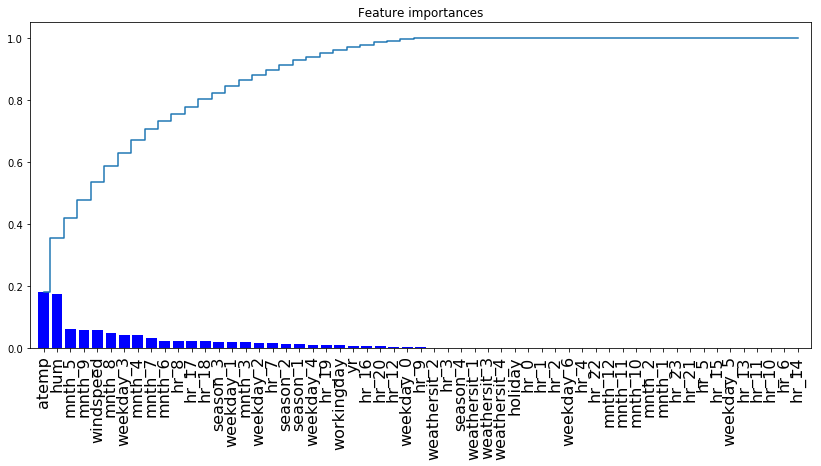

In [417]:
# Identify the features which are most important

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree=tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )

X_train = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
y_train = train.loc[:, 'registered']

dtree=dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = train.drop(['cnt', 'registered', 'casual'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(14,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='blue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=16)
plt.xlim([-1, len(indices)])
plt.show()

In [449]:
reg_train = train.copy()
reg_train = reg_train.drop(feat_names[indices[29:]], axis =1)

In [451]:
reg_test = test.copy()
reg_test = reg_test.drop(feat_names[indices[29:]], axis =1)

In [453]:
def score_model_reg(train, test, seed = 123):
    X_train = train.loc[:, (train.columns != 'cnt') & (train.columns != 'casual') & (train.columns != 'registered') ]
    y_train = train.loc[:, 'registered']
    
    X_test = test.loc[:, (test.columns != 'cnt') & (test.columns != 'casual') & (test.columns != 'registered') ]
    y_test = test.loc[:, 'registered']             
                        
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=seed)

    pipeline = Pipeline([
        #('polynomials', PolynomialFeatures(degree=3, include_bias=False)), 
        ('linear_regression', LinearRegression(n_jobs=-1))])
    #pipeline.fit(X_train, y_train)
    training_score = score_no_negatives(pipeline, X_test, y_test, X_train, y_train)
    print('R2 from entire-dataset estimator: {:.2f}'.format(training_score))

    # Obtain scores and estimators from different splits and use the best one.
    scores = cross_validate(pipeline, 
                            X_train, y_train,
                            scoring=['r2'], 
                            cv=cv,
                            return_estimator=True)
    split_scores = [scores['estimator'][i].score(X_test, y_test) 
                    for i in range(len(scores))]
    index_best = split_scores.index(max(split_scores))
    print('Best estimator R2 score: {:.2f}'.format(split_scores[index_best]))

In [456]:
score_model_reg(reg_train, reg_test)

R2 from entire-dataset estimator: 0.57
Best estimator R2 score: 0.57
